In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


plt.style.use('classic')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jrusmon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jrusmon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
base_df = pd.read_csv('20191226-reviews.csv')

base_df.head(3)

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0


In [3]:
sw = stopwords.words('english')
contractions = {}
with open('contractions.csv', 'r') as file:
    reader = csv.reader(file)
    for i, e in enumerate(reader):
        if i == 0:
            continue

        contractions[e[0]] = e[1]

wnl = WordNetLemmatizer()

# Exploratory Data Analysis

In [4]:
base_df.describe()

,rating,helpfulVotes
count,67986.000000,27215.000000
mean,3.807916,8.229690
std,1.582906,31.954877
min,1.000000,1.000000
25%,3.000000,1.000000
50%,5.000000,2.000000
75%,5.000000,5.000000
max,5.000000,990.000000


In [5]:
base_df.describe(include='object')

,asin,name,date,title,body
count,67986,67984,67986,67972,67965
unique,720,47323,2983,41489,59811
top,B00F2SKPIM,Amazon Customer,"December 11, 2019",Five Stars,Good
freq,981,6507,234,6043,303


In [6]:
base_df.isnull().sum()

asin                0
name                2
rating              0
date                0
verified            0
title              14
body               21
helpfulVotes    40771
dtype: int64

In [7]:
base_df.dropna(inplace=True)

In [8]:
# Make rating descriptive
base_df['label'] = base_df['rating'].replace({
    1: 'Bad', 
    2: 'Bad', 
    3: 'Good', 
    4: 'Good', 
    5: 'Good'
})

base_df.head()

,asin,name,rating,date,verified,title,body,helpfulVotes,label
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,Good
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,Bad
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,Good
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,Good
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,Good


<AxesSubplot:xlabel='label', ylabel='count'>

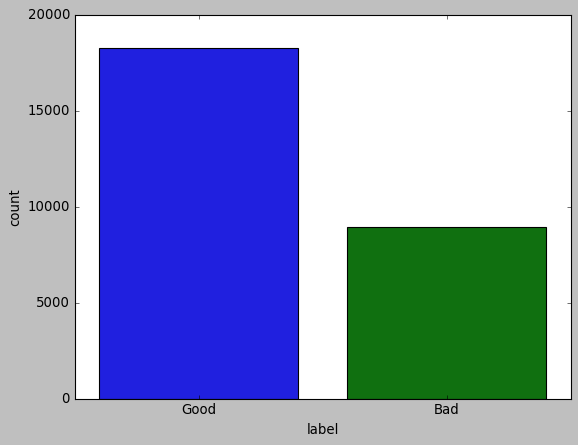

In [9]:
sns.countplot(data=base_df, x=base_df['label'])

<AxesSubplot:xlabel='verified', ylabel='count'>

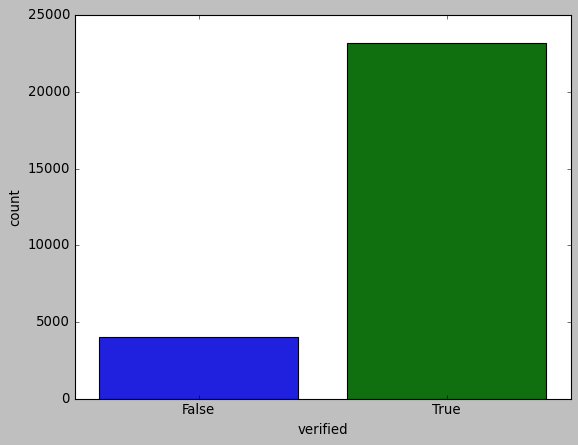

In [10]:
sns.countplot(x=base_df['verified'])

In [11]:
base_df['count'] = base_df['body'].apply(lambda x: len(str(x).split()))
base_df['length'] = base_df['body'].astype(str).apply(len)

base_df['length'], base_df['count']

(0        1688
 1         748
 2         768
 3         524
 4         606
          ... 
 67978    5357
 67979    2178
 67980    1959
 67981     636
 67982     523
 Name: length, Length: 27206, dtype: int64,
 0        327
 1        129
 2        131
 3        107
 4        128
         ... 
 67978    982
 67979    407
 67980    378
 67981    127
 67982    102
 Name: count, Length: 27206, dtype: int64)

In [12]:
base_df.loc[base_df['length'] == base_df['length'].max()]

,asin,name,rating,date,verified,title,body,helpfulVotes,label,count,length
4388,B00A2V7BA4,Gao Atamazon,5,"November 14, 2012",False,Let's compare it with the iPhone,_________________________________________ A no...,1.0,Good,5345,32182


<AxesSubplot:xlabel='length'>

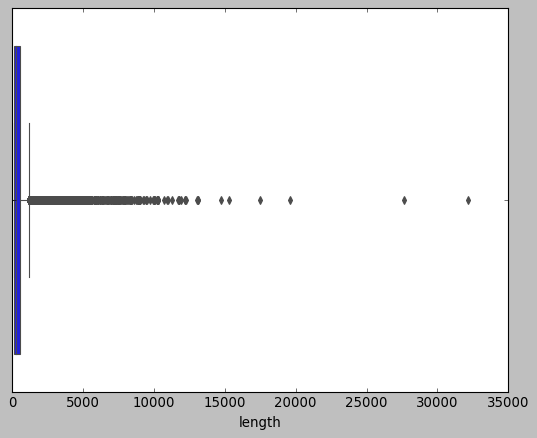

In [13]:
sns.boxplot(x=base_df['length'])

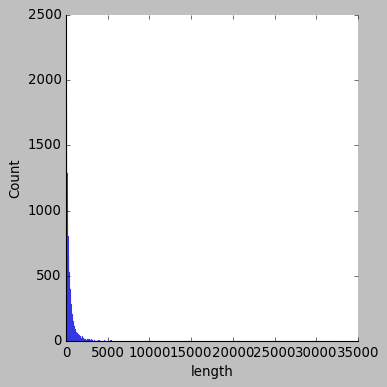

In [14]:
sns.displot(x=base_df['length'])

<AxesSubplot:xlabel='count'>

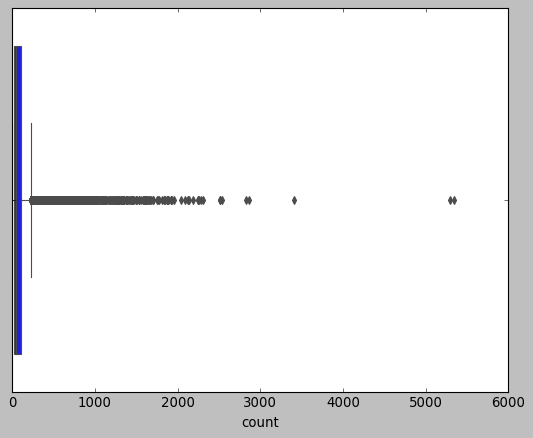

In [15]:
sns.boxplot(x=base_df['count'])

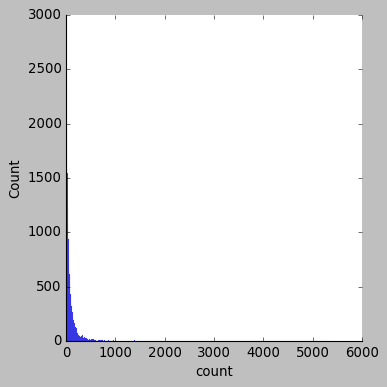

In [16]:
sns.displot(x=base_df['count'])

In [17]:
per_product = base_df.groupby(['asin', 'rating', 'verified']).agg({'length': 'mean', 'count': 'mean'})

per_product

length       count
asin       rating verified                         
B0000SX2UC 1      False     1161.500000  215.500000
           2      False     2000.000000  386.000000
           3      False      877.666667  170.333333
           4      False      851.250000  163.250000
           5      False      649.666667  116.333333
...                                 ...         ...
B081H6STQQ 3      True       241.000000   39.000000
           4      False     3647.166667  676.000000
                  True      2947.000000  527.500000
           5      False     1267.777778  237.000000
                  True       510.421053   95.368421

[3302 rows x 2 columns]

# Preprocessing

<AxesSubplot:xlabel='label', ylabel='count'>

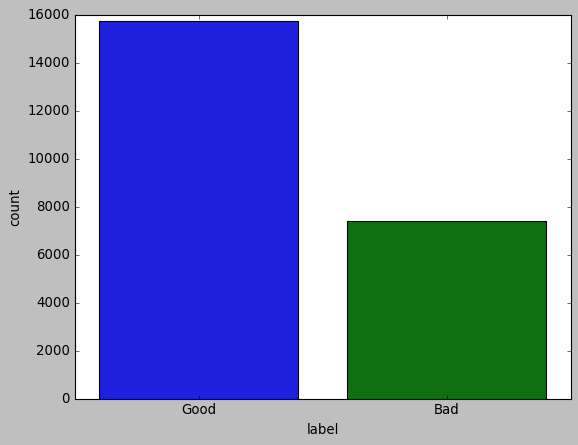

In [18]:
#use only verified accounts
base_df = base_df.loc[base_df['verified']==True]

sns.countplot(x=base_df['label'])

## Outliers

In [19]:
# Remove outliers from length
Q1 = base_df['length'].quantile(0.25)
Q3 = base_df['length'].quantile(0.75)
IQR = Q3 - Q1
print("Q1:%i" %Q1)
print("Q3:%i" %Q3)
print("IQR:%i" %IQR)

Q1:86
Q3:443
IQR:357


In [20]:
df_out = base_df[~((base_df["length"] < (Q1 - 1.5 * IQR)) |(base_df["length"] > (Q3 + 1.5 * IQR)))]

base_df.shape[0], df_out.shape[0]

(23154, 21227)

<AxesSubplot:xlabel='length'>

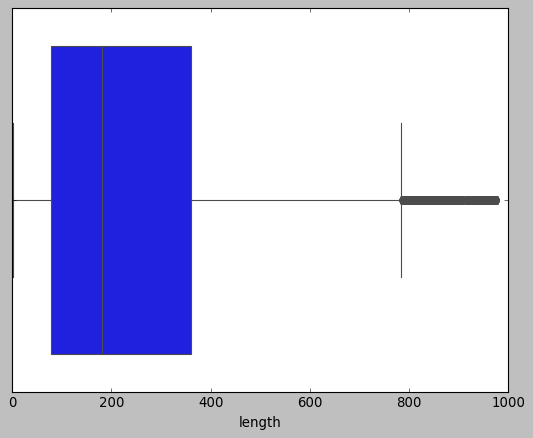

In [21]:
sns.boxplot(x=df_out['length'])

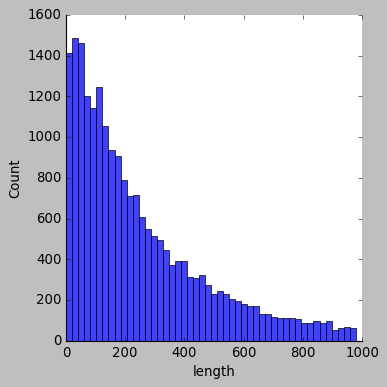

In [22]:
sns.displot(x=df_out['length'])

In [23]:
#remove length outliers

base_df = df_out.copy()

In [24]:
Q1 = base_df['count'].quantile(0.25)
Q3 = base_df['count'].quantile(0.75)
IQR = Q3 - Q1
print("Q1:%i" %Q1)
print("Q3:%i" %Q3)
print("IQR:%i" %IQR)

Q1:14
Q3:68
IQR:54


In [25]:
df_out = base_df[~((base_df["count"] < (Q1 - 1.5 * IQR)) |(base_df["count"] > (Q3 + 1.5 * IQR)))]

base_df.shape[0], df_out.shape[0]

(21227, 20523)

<AxesSubplot:xlabel='count'>

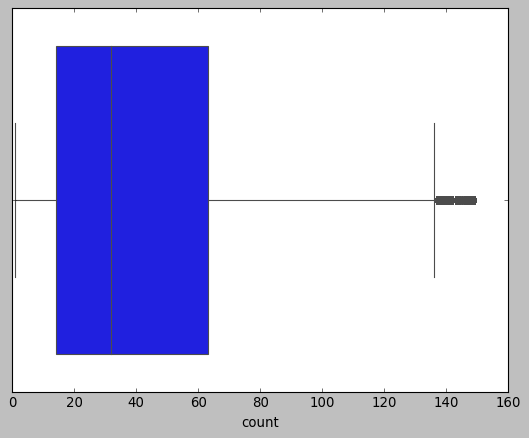

In [26]:
sns.boxplot(x=df_out['count'])

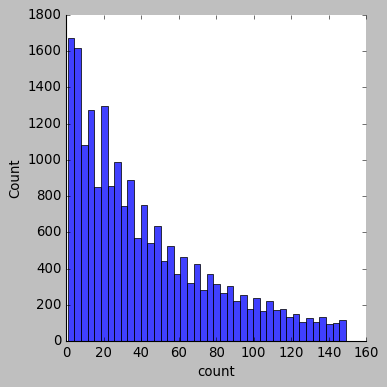

In [27]:
sns.displot(x=df_out['count'])

In [28]:
#remove count outliers

base_df = df_out.copy()

base_df.shape

(20523, 11)

## Remove Unnecessary Fields

In [29]:
#remove unnecessary fields
base_df = base_df.loc[:, ['body', 'label']]


# Cleaning Text Data

In [30]:
new_df = base_df.copy()

# make lowercase
new_df['clean'] = base_df['body'].apply(lambda x: x.lower())

In [32]:
new_df['clean'].iloc[2]

"wouldn't know anything about the cell phone i ordered because the person hasn't even shipped it yet. it's been a month! and amazon has does nothing to help and really has nothing for an option to provide assistance."

In [33]:
# remove numbers
new_df['clean'] = new_df['clean'].apply(lambda x: re.sub('\w*\d\w*',' ', x))

In [34]:
new_df['clean'].iloc[2]

"wouldn't know anything about the cell phone i ordered because the person hasn't even shipped it yet. it's been a month! and amazon has does nothing to help and really has nothing for an option to provide assistance."

In [35]:
# remove punctuations
new_df['clean']=new_df['clean'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [36]:
new_df['clean'].iloc[2]

'wouldnt know anything about the cell phone i ordered because the person hasnt even shipped it yet its been a month and amazon has does nothing to help and really has nothing for an option to provide assistance'

In [37]:
# expand contracted words e.g. you'll, I'm, I've
def expand_contractions(text,contractions_dict=contractions):
  cleaned_list = [contractions_dict[word] if contractions_dict.get(word) else word for word in text.split(' ')]
  return ' '.join(cleaned_list)

new_df['clean'] = new_df['clean'].apply(lambda x: expand_contractions(x))

new_df['clean'].iloc[2]


'would not know anything about the cell phone i ordered because the person has not even shipped it yet it has been a month and amazon has does nothing to help and really has nothing for an option to provide assistance'

In [38]:
# lemmatize and remove stop words

def norm_words(text):
    return ' '.join([wnl.lemmatize(word) for word in text.split() if not word in sw])

new_df['lemmatized'] = new_df['clean'].apply(lambda x: norm_words(x))

new_df['lemmatized'].iloc[2]

'would know anything cell phone ordered person even shipped yet month amazon nothing help really nothing option provide assistance'

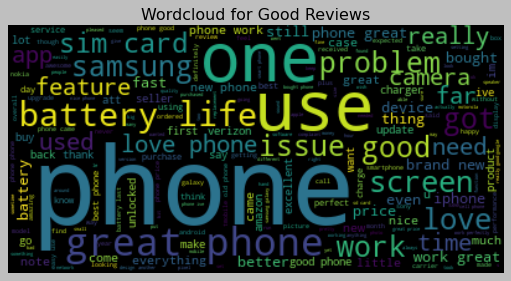

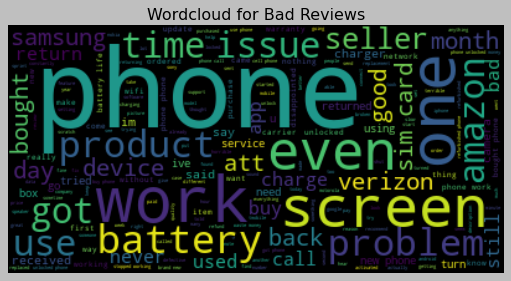

In [39]:
from wordcloud import WordCloud

good_df = new_df.loc[new_df['label'] == 'Good']
bad_df = new_df.loc[new_df['label'] == 'Bad']

good_text = good_df['lemmatized'].to_list()
bad_text = bad_df['lemmatized'].to_list()

good_cloud = WordCloud().generate(text=' '.join(good_text))
bad_cloud = WordCloud().generate(text=' '.join(bad_text))

plt.figure(figsize=(8,8))
plt.title('Wordcloud for Good Reviews')
plt.imshow(good_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

plt.figure(figsize=(8,8))
plt.title('Wordcloud for Bad Reviews')
plt.imshow(bad_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Tokenize Words

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

# put tokenized data to x
X = cv.fit_transform(new_df['lemmatized'])

X.shape

(20523, 16669)

In [41]:
# put labels to y
y = new_df['label']

y.shape

(20523,)

# Split Data

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14366, 16669), (6157, 16669), (14366,), (6157,))

# Train Models

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

LR = LogisticRegression(max_iter=1500)
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()

In [44]:
LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         Bad       0.81      0.79      0.80      2000
        Good       0.90      0.91      0.91      4157

    accuracy                           0.87      6157
   macro avg       0.86      0.85      0.85      6157
weighted avg       0.87      0.87      0.87      6157



Text(0.5, 31.999999999999986, 'Predicted label')

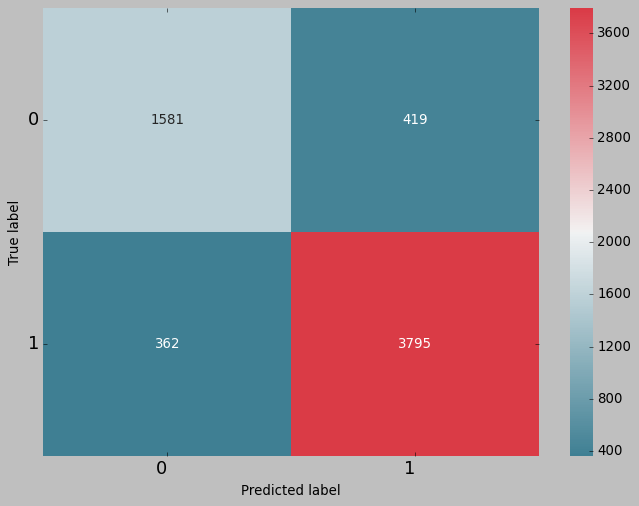

In [45]:
#Plot the confusion matrix for easier viewing
cm = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, index=[0,1], columns=[0,1])

fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
heatmap = sns.heatmap(df_cm,annot=True, fmt="d", cmap=cmap)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [46]:
DT.fit(X_train, y_train)

y_pred = DT.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         Bad       0.72      0.69      0.70      2000
        Good       0.85      0.87      0.86      4157

    accuracy                           0.81      6157
   macro avg       0.78      0.78      0.78      6157
weighted avg       0.81      0.81      0.81      6157



Text(0.5, 31.999999999999986, 'Predicted label')

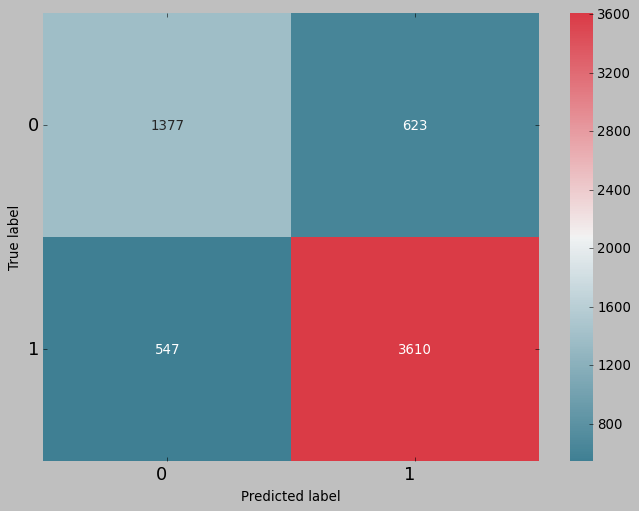

In [47]:
#Plot the confusion matrix for easier viewing
cm = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, index=[0,1], columns=[0,1])

fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
heatmap = sns.heatmap(df_cm,annot=True, fmt="d", cmap=cmap)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [48]:
RF.fit(X_train, y_train)

y_pred = RF.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         Bad       0.84      0.77      0.80      2000
        Good       0.89      0.93      0.91      4157

    accuracy                           0.88      6157
   macro avg       0.87      0.85      0.86      6157
weighted avg       0.88      0.88      0.88      6157



Text(0.5, 31.999999999999986, 'Predicted label')

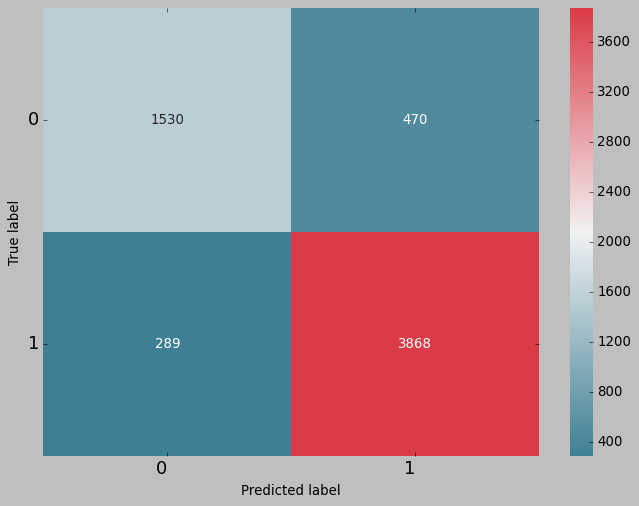

In [49]:
#Plot the confusion matrix for easier viewing
cm = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, index=[0,1], columns=[0,1])

fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
heatmap = sns.heatmap(df_cm,annot=True, fmt="d", cmap=cmap)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

## LogisticRegression is the best Model